In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import tensorflow as tf

In [2]:
# !pip install sklearn

In [4]:
from sklearn.model_selection import train_test_split

In [4]:
Data_set = np.loadtxt("data/ThoraricSurgery.csv", delimiter =",")

In [5]:
Data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [6]:
Data_set[0]

array([293. ,   1. ,   3.8,   2.8,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,  12. ,   0. ,   0. ,   0. ,   1. ,   0. ,  62. ,   0. ])

### 문제와 답 나누기

In [7]:
X = Data_set[:, :17]
y = Data_set[:, 17]

In [8]:
X

array([[293.  ,   1.  ,   3.8 , ...,   1.  ,   0.  ,  62.  ],
       [  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,   0.  ,  62.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,   0.  ,  58.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,   0.  ,  49.  ]])

In [9]:
y

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 60)

In [11]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### 신경망 모델 설계

In [12]:
# model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)
# model.add(Dense(10, input_dim =17 , activation="relu")) # Dense layer를 정의하는 함수
# model.add(Dense(1, activation="sigmoid"))

# model.summary()

In [13]:
tf.random.set_seed

model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)

# add()- 신경망에 layer를 추가하는 함수
model.add(Dense(10, input_dim = 17)) # Dense layer를 정의하는 함수
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])

### 학습

In [15]:
model.fit(X_train, y_train, epochs=5000, batch_size=30)

Train on 329 samples
Epoch 1/5000
329/329 [==============================] - 1s 3ms/sample - loss: 38.3769 - acc: 0.1520
Epoch 2/5000
329/329 [==============================] - 0s 71us/sample - loss: 31.2863 - acc: 0.1520
Epoch 3/5000
329/329 [==============================] - 0s 60us/sample - loss: 23.1275 - acc: 0.1520
Epoch 4/5000
329/329 [==============================] - 0s 61us/sample - loss: 14.1595 - acc: 0.1520
Epoch 5/5000
329/329 [==============================] - 0s 67us/sample - loss: 5.5800 - acc: 0.2796
Epoch 6/5000
329/329 [==============================] - 0s 64us/sample - loss: 1.0553 - acc: 0.7568
Epoch 7/5000
329/329 [==============================] - 0s 61us/sample - loss: 1.1929 - acc: 0.8237
Epoch 8/5000
329/329 [==============================] - 0s 58us/sample - loss: 1.1865 - acc: 0.8267
Epoch 9/5000
329/329 [==============================] - 0s 58us/sample - loss: 1.0596 - acc: 0.8237
Epoch 10/5000
329/329 [==============================] - 0s 51us/sample - lo

329/329 [==============================] - 0s 49us/sample - loss: 0.3888 - acc: 0.8511
Epoch 162/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3913 - acc: 0.8511
Epoch 163/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3927 - acc: 0.8511
Epoch 164/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3886 - acc: 0.8511
Epoch 165/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3902 - acc: 0.8511
Epoch 166/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3905 - acc: 0.8511
Epoch 167/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3894 - acc: 0.8511
Epoch 168/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.4073 - acc: 0.8571
Epoch 169/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3946 - acc: 0.8511
Epoch 170/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3903 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3699 - acc: 0.8602
Epoch 322/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3739 - acc: 0.8571
Epoch 323/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3824 - acc: 0.8602
Epoch 324/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3777 - acc: 0.8602
Epoch 325/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3715 - acc: 0.8602
Epoch 326/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3701 - acc: 0.8663
Epoch 327/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3735 - acc: 0.8571
Epoch 328/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3685 - acc: 0.8632
Epoch 329/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.4090 - acc: 0.8541
Epoch 330/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.4025 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3512 - acc: 0.8693
Epoch 482/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3532 - acc: 0.8663
Epoch 483/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3576 - acc: 0.8663
Epoch 484/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3536 - acc: 0.8632
Epoch 485/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3561 - acc: 0.8663
Epoch 486/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3539 - acc: 0.8693
Epoch 487/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3740 - acc: 0.8632
Epoch 488/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3604 - acc: 0.8571
Epoch 489/5000
329/329 [==============================] - 0s 97us/sample - loss: 0.3541 - acc: 0.8693
Epoch 490/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3561 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3456 - acc: 0.8754
Epoch 562/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3433 - acc: 0.8571
Epoch 563/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3528 - acc: 0.8663
Epoch 564/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3628 - acc: 0.8571
Epoch 565/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3548 - acc: 0.8693
Epoch 566/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3461 - acc: 0.8632
Epoch 567/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3557 - acc: 0.8632
Epoch 568/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3891 - acc: 0.8511
Epoch 569/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3565 - acc: 0.8663
Epoch 570/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3591 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3384 - acc: 0.8754
Epoch 722/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3412 - acc: 0.8693
Epoch 723/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3380 - acc: 0.8693
Epoch 724/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3358 - acc: 0.8571
Epoch 725/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3431 - acc: 0.8663
Epoch 726/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3466 - acc: 0.8632
Epoch 727/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3383 - acc: 0.8602
Epoch 728/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3334 - acc: 0.8663
Epoch 729/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3348 - acc: 0.8723
Epoch 730/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3430 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3510 - acc: 0.8693
Epoch 882/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3618 - acc: 0.8663
Epoch 883/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3637 - acc: 0.8632
Epoch 884/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3341 - acc: 0.8693
Epoch 885/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3320 - acc: 0.8632
Epoch 886/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3299 - acc: 0.8754
Epoch 887/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3305 - acc: 0.8754
Epoch 888/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3276 - acc: 0.8663
Epoch 889/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3277 - acc: 0.8693
Epoch 890/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3357 - acc: 0.

329/329 [==============================] - 0s 49us/sample - loss: 0.3236 - acc: 0.8693
Epoch 1041/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3310 - acc: 0.8693
Epoch 1042/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3257 - acc: 0.8632
Epoch 1043/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3631 - acc: 0.8663
Epoch 1044/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3244 - acc: 0.8754
Epoch 1045/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3291 - acc: 0.8723
Epoch 1046/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3346 - acc: 0.8693
Epoch 1047/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.4025 - acc: 0.8571
Epoch 1048/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3565 - acc: 0.8754
Epoch 1049/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3353 

329/329 [==============================] - 0s 49us/sample - loss: 0.3279 - acc: 0.8754
Epoch 1199/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3361 - acc: 0.8693
Epoch 1200/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3231 - acc: 0.8693
Epoch 1201/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3342 - acc: 0.8815
Epoch 1202/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3246 - acc: 0.8815
Epoch 1203/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3332 - acc: 0.8663
Epoch 1204/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3312 - acc: 0.8875
Epoch 1205/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3464 - acc: 0.8906
Epoch 1206/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3186 - acc: 0.8754
Epoch 1207/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3312 

329/329 [==============================] - 0s 49us/sample - loss: 0.3363 - acc: 0.8723
Epoch 1357/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3254 - acc: 0.8784
Epoch 1358/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3180 - acc: 0.8754
Epoch 1359/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3143 - acc: 0.8754
Epoch 1360/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3187 - acc: 0.8754
Epoch 1361/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3211 - acc: 0.8815
Epoch 1362/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3210 - acc: 0.8845
Epoch 1363/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3169 - acc: 0.8784
Epoch 1364/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3174 - acc: 0.8723
Epoch 1365/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3287 

329/329 [==============================] - 0s 49us/sample - loss: 0.3205 - acc: 0.8723
Epoch 1515/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3191 - acc: 0.8845
Epoch 1516/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3179 - acc: 0.8845
Epoch 1517/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3127 - acc: 0.8815
Epoch 1518/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3324 - acc: 0.8663
Epoch 1519/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3166 - acc: 0.8875
Epoch 1520/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3201 - acc: 0.8784
Epoch 1521/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3187 - acc: 0.8784
Epoch 1522/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3272 - acc: 0.8815
Epoch 1523/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3270 

329/329 [==============================] - 0s 73us/sample - loss: 0.3261 - acc: 0.8784
Epoch 1673/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3156 - acc: 0.8784
Epoch 1674/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3193 - acc: 0.8845
Epoch 1675/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3179 - acc: 0.8875
Epoch 1676/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3343 - acc: 0.8663
Epoch 1677/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3286 - acc: 0.8936
Epoch 1678/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3372 - acc: 0.8754
Epoch 1679/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3340 - acc: 0.8723
Epoch 1680/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3176 - acc: 0.8936
Epoch 1681/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3149 

329/329 [==============================] - 0s 49us/sample - loss: 0.3200 - acc: 0.8845
Epoch 1831/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3145 - acc: 0.8815
Epoch 1832/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3106 - acc: 0.8845
Epoch 1833/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3095 - acc: 0.8815
Epoch 1834/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3158 - acc: 0.8815
Epoch 1835/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3279 - acc: 0.8875
Epoch 1836/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3442 - acc: 0.8784
Epoch 1837/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3179 - acc: 0.8784
Epoch 1838/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3125 - acc: 0.8815
Epoch 1839/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3103 

329/329 [==============================] - 0s 49us/sample - loss: 0.3211 - acc: 0.8875
Epoch 1989/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3156 - acc: 0.8906
Epoch 1990/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3192 - acc: 0.8815
Epoch 1991/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3206 - acc: 0.8875
Epoch 1992/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3092 - acc: 0.8875
Epoch 1993/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3170 - acc: 0.8754
Epoch 1994/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3100 - acc: 0.8875
Epoch 1995/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3153 - acc: 0.8784
Epoch 1996/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3163 - acc: 0.8754
Epoch 1997/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3069 

329/329 [==============================] - 0s 49us/sample - loss: 0.3073 - acc: 0.8845
Epoch 2147/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3146 - acc: 0.8845
Epoch 2148/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3071 - acc: 0.8875
Epoch 2149/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3127 - acc: 0.8875
Epoch 2150/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3216 - acc: 0.8815
Epoch 2151/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3115 - acc: 0.8906
Epoch 2152/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3075 - acc: 0.8784
Epoch 2153/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3019 - acc: 0.8906
Epoch 2154/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3542 - acc: 0.8632
Epoch 2155/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3180 

329/329 [==============================] - 0s 49us/sample - loss: 0.3175 - acc: 0.8845
Epoch 2305/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3182 - acc: 0.8845
Epoch 2306/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3068 - acc: 0.8875
Epoch 2307/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3094 - acc: 0.8784
Epoch 2308/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3076 - acc: 0.8845
Epoch 2309/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3071 - acc: 0.8815
Epoch 2310/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3118 - acc: 0.8845
Epoch 2311/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3079 - acc: 0.8845
Epoch 2312/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3119 - acc: 0.8784
Epoch 2313/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3113 

329/329 [==============================] - 0s 54us/sample - loss: 0.3084 - acc: 0.8967
Epoch 2463/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.3119 - acc: 0.8875
Epoch 2464/5000
329/329 [==============================] - 0s 54us/sample - loss: 0.3297 - acc: 0.8754
Epoch 2465/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3400 - acc: 0.8632
Epoch 2466/5000
329/329 [==============================] - 0s 50us/sample - loss: 0.3332 - acc: 0.8845
Epoch 2467/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3266 - acc: 0.8723
Epoch 2468/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3260 - acc: 0.8875
Epoch 2469/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3144 - acc: 0.8815
Epoch 2470/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3096 - acc: 0.8845
Epoch 2471/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3042 

329/329 [==============================] - 0s 55us/sample - loss: 0.3058 - acc: 0.8845
Epoch 2621/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.3072 - acc: 0.8875
Epoch 2622/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3061 - acc: 0.8875
Epoch 2623/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3060 - acc: 0.8815
Epoch 2624/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3178 - acc: 0.8815
Epoch 2625/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3116 - acc: 0.8754
Epoch 2626/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3045 - acc: 0.8875
Epoch 2627/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3027 - acc: 0.8815
Epoch 2628/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3112 - acc: 0.8754
Epoch 2629/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.3113 

329/329 [==============================] - 0s 52us/sample - loss: 0.3148 - acc: 0.8784
Epoch 2779/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.2948 - acc: 0.8815
Epoch 2780/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3183 - acc: 0.8845
Epoch 2781/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3161 - acc: 0.8906
Epoch 2782/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3086 - acc: 0.8815
Epoch 2783/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3055 - acc: 0.8875
Epoch 2784/5000
329/329 [==============================] - 0s 45us/sample - loss: 0.3109 - acc: 0.8815
Epoch 2785/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3012 - acc: 0.8815
Epoch 2786/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3092 - acc: 0.8906
Epoch 2787/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3015 

329/329 [==============================] - 0s 55us/sample - loss: 0.3093 - acc: 0.8815
Epoch 2937/5000
329/329 [==============================] - 0s 58us/sample - loss: 0.3054 - acc: 0.8906
Epoch 2938/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3036 - acc: 0.8815
Epoch 2939/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3135 - acc: 0.8875
Epoch 2940/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.3051 - acc: 0.8875
Epoch 2941/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3103 - acc: 0.8815
Epoch 2942/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3030 - acc: 0.8815
Epoch 2943/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.2969 - acc: 0.8845
Epoch 2944/5000
329/329 [==============================] - 0s 54us/sample - loss: 0.3071 - acc: 0.8875
Epoch 2945/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3101 

329/329 [==============================] - 0s 52us/sample - loss: 0.2979 - acc: 0.8875
Epoch 3095/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3042 - acc: 0.8815
Epoch 3096/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3000 - acc: 0.8936
Epoch 3097/5000
329/329 [==============================] - 0s 50us/sample - loss: 0.3048 - acc: 0.8906
Epoch 3098/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3300 - acc: 0.8875
Epoch 3099/5000
329/329 [==============================] - 0s 51us/sample - loss: 0.3026 - acc: 0.8784
Epoch 3100/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3046 - acc: 0.8875
Epoch 3101/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3025 - acc: 0.8875
Epoch 3102/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3092 - acc: 0.8784
Epoch 3103/5000
329/329 [==============================] - 0s 48us/sample - loss: 0.3035 

329/329 [==============================] - 0s 52us/sample - loss: 0.3134 - acc: 0.8693
Epoch 3253/5000
329/329 [==============================] - 0s 55us/sample - loss: 0.3330 - acc: 0.8754
Epoch 3254/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3054 - acc: 0.8875
Epoch 3255/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3118 - acc: 0.8845
Epoch 3256/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3154 - acc: 0.8845
Epoch 3257/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3070 - acc: 0.8875
Epoch 3258/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3018 - acc: 0.8906
Epoch 3259/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2995 - acc: 0.8875
Epoch 3260/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3039 - acc: 0.8815
Epoch 3261/5000
329/329 [==============================] - 0s 52us/sample - loss: 0.3131 

329/329 [==============================] - 0s 49us/sample - loss: 0.3102 - acc: 0.8875
Epoch 3411/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3079 - acc: 0.8815
Epoch 3412/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3121 - acc: 0.8693
Epoch 3413/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3270 - acc: 0.8875
Epoch 3414/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3307 - acc: 0.8815
Epoch 3415/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3210 - acc: 0.8693
Epoch 3416/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3085 - acc: 0.8845
Epoch 3417/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3034 - acc: 0.8845
Epoch 3418/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2998 - acc: 0.8875
Epoch 3419/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3089 

329/329 [==============================] - 0s 49us/sample - loss: 0.3323 - acc: 0.8480
Epoch 3569/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3203 - acc: 0.8784
Epoch 3570/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2960 - acc: 0.8875
Epoch 3571/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2988 - acc: 0.8906
Epoch 3572/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3007 - acc: 0.8845
Epoch 3573/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3060 - acc: 0.8784
Epoch 3574/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3068 - acc: 0.8754
Epoch 3575/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2992 - acc: 0.8815
Epoch 3576/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3293 - acc: 0.8480
Epoch 3577/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3269 

329/329 [==============================] - 0s 49us/sample - loss: 0.2969 - acc: 0.8784
Epoch 3727/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3344 - acc: 0.8875
Epoch 3728/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3033 - acc: 0.8845
Epoch 3729/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3111 - acc: 0.8693
Epoch 3730/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3075 - acc: 0.8875
Epoch 3731/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3129 - acc: 0.8875
Epoch 3732/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2991 - acc: 0.8845
Epoch 3733/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3035 - acc: 0.8845
Epoch 3734/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2949 - acc: 0.8875
Epoch 3735/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3052 

329/329 [==============================] - 0s 49us/sample - loss: 0.3002 - acc: 0.8845
Epoch 3885/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3266 - acc: 0.8815
Epoch 3886/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3267 - acc: 0.8511
Epoch 3887/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3295 - acc: 0.8906
Epoch 3888/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3182 - acc: 0.8754
Epoch 3889/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3036 - acc: 0.8936
Epoch 3890/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3084 - acc: 0.8875
Epoch 3891/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2992 - acc: 0.8906
Epoch 3892/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2986 - acc: 0.8845
Epoch 3893/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3106 

329/329 [==============================] - 0s 49us/sample - loss: 0.3036 - acc: 0.8875
Epoch 4043/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3070 - acc: 0.8875
Epoch 4044/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3000 - acc: 0.8845
Epoch 4045/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3044 - acc: 0.8906
Epoch 4046/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2966 - acc: 0.8815
Epoch 4047/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2992 - acc: 0.8967
Epoch 4048/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3006 - acc: 0.8845
Epoch 4049/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3043 - acc: 0.8936
Epoch 4050/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3169 - acc: 0.8845
Epoch 4051/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3033 

329/329 [==============================] - 0s 49us/sample - loss: 0.3009 - acc: 0.8875
Epoch 4201/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3089 - acc: 0.8845
Epoch 4202/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2950 - acc: 0.8815
Epoch 4203/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2994 - acc: 0.8875
Epoch 4204/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3000 - acc: 0.8784
Epoch 4205/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2995 - acc: 0.8845
Epoch 4206/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3011 - acc: 0.8845
Epoch 4207/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3078 - acc: 0.8875
Epoch 4208/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3037 - acc: 0.8845
Epoch 4209/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3283 

329/329 [==============================] - 0s 49us/sample - loss: 0.3069 - acc: 0.8845
Epoch 4359/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3051 - acc: 0.8845
Epoch 4360/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2955 - acc: 0.8845
Epoch 4361/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3043 - acc: 0.8845
Epoch 4362/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2983 - acc: 0.8845
Epoch 4363/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2995 - acc: 0.8845
Epoch 4364/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3123 - acc: 0.8875
Epoch 4365/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2994 - acc: 0.8815
Epoch 4366/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3006 - acc: 0.8845
Epoch 4367/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2973 

329/329 [==============================] - 0s 49us/sample - loss: 0.2984 - acc: 0.8967
Epoch 4517/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3147 - acc: 0.8845
Epoch 4518/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2949 - acc: 0.8875
Epoch 4519/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2950 - acc: 0.8875
Epoch 4520/5000
329/329 [==============================] - ETA: 0s - loss: 0.2794 - acc: 0.866 - 0s 49us/sample - loss: 0.3011 - acc: 0.8936
Epoch 4521/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3159 - acc: 0.8845
Epoch 4522/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3121 - acc: 0.8906
Epoch 4523/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3246 - acc: 0.8815
Epoch 4524/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3160 - acc: 0.8723
Epoch 4525/5000
329/329 [==========================

329/329 [==============================] - 0s 49us/sample - loss: 0.3009 - acc: 0.8906
Epoch 4675/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3107 - acc: 0.8815
Epoch 4676/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3432 - acc: 0.8815
Epoch 4677/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3227 - acc: 0.8754
Epoch 4678/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.3011 - acc: 0.8875
Epoch 4679/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2978 - acc: 0.8845
Epoch 4680/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2969 - acc: 0.8875
Epoch 4681/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3097 - acc: 0.8754
Epoch 4682/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3188 - acc: 0.8784
Epoch 4683/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2987 

329/329 [==============================] - 0s 73us/sample - loss: 0.3008 - acc: 0.8875
Epoch 4833/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2988 - acc: 0.8875
Epoch 4834/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3040 - acc: 0.8815
Epoch 4835/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2989 - acc: 0.8936
Epoch 4836/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2973 - acc: 0.8815
Epoch 4837/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3038 - acc: 0.8906
Epoch 4838/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2994 - acc: 0.8875
Epoch 4839/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3001 - acc: 0.8875
Epoch 4840/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3002 - acc: 0.8845
Epoch 4841/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3081 

329/329 [==============================] - 0s 49us/sample - loss: 0.3040 - acc: 0.8815
Epoch 4991/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3118 - acc: 0.8936
Epoch 4992/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2994 - acc: 0.8936
Epoch 4993/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.3001 - acc: 0.8845
Epoch 4994/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2933 - acc: 0.8906
Epoch 4995/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2997 - acc: 0.8906
Epoch 4996/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2971 - acc: 0.8936
Epoch 4997/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2989 - acc: 0.8784
Epoch 4998/5000
329/329 [==============================] - 0s 49us/sample - loss: 0.2992 - acc: 0.8906
Epoch 4999/5000
329/329 [==============================] - 0s 73us/sample - loss: 0.2952 

In [16]:
w = model.get_weights() # 이 모델이 결정한 가중치값

In [17]:
w[0].shape

(17, 10)

In [18]:
w[1].shape

(10,)

In [19]:
w[2].shape

(10, 1)

In [20]:
w[3].shape

(1,)

### 평가

In [21]:
model.evaluate(X_test, y_test)

141/141 [==============================] - 0s 454us/sample - loss: 1.3435 - acc: 0.8369


[1.3435485536325062, 0.83687943]

In [22]:
model.predict(X_test)

array([[1.53425366e-01],
       [9.28261355e-02],
       [6.33560419e-02],
       [1.72964316e-02],
       [2.42473576e-02],
       [8.53260830e-02],
       [1.23767577e-01],
       [6.17557883e-01],
       [8.57290104e-02],
       [1.88041314e-01],
       [1.34903401e-01],
       [1.59191355e-01],
       [2.22762868e-01],
       [1.91823334e-01],
       [7.94800669e-02],
       [2.74903029e-01],
       [2.64619559e-01],
       [1.33072019e-01],
       [1.29455514e-02],
       [7.38315444e-26],
       [3.03426921e-01],
       [1.44753098e-01],
       [1.13358945e-01],
       [2.55461514e-01],
       [1.03771150e-01],
       [2.69107550e-01],
       [1.22220032e-01],
       [2.08968550e-01],
       [1.40608232e-02],
       [2.85939071e-02],
       [6.87096268e-02],
       [2.97935903e-01],
       [2.85733044e-01],
       [2.09583074e-01],
       [2.65516877e-01],
       [2.08015636e-11],
       [3.61843891e-02],
       [1.52146256e-07],
       [2.28057742e-01],
       [6.72479346e-02],


### 2 wine 분류 (다중 분류)

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [24]:
 wine = pd.read_csv('data/wine.csv')

In [25]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [26]:
len(wine.columns)

13

## 2.1 문제와 답 나누기

In [27]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [28]:
# X = wine.iloc[:, :11] 
# y = wine.iloc[:,11]
y = wine.iloc[:, -2]
del wine['quality']
X = wine

y_en = pd.get_dummies(y)  #원핫 인코딩, y 컬럼을 7개로 인코딩

X.shape, y_en.shape

((6497, 12), (6497, 7))

In [29]:
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

### 2.2 train / test data 나누기

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_en,
                                                   test_size = 0.3,
                                                   random_state = 60)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4547, 12), (1950, 12), (4547, 7), (1950, 7))

### 신경망 설계

In [31]:
model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)
model.add(Dense(24, input_dim =12 , activation="relu")) # 은닉층1
model.add(Dense(48, input_dim =12 , activation="relu"))# 은닉층2
model.add(Dense(7, activation="softmax")) # 출력층

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 48)                1200      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 343       
Total params: 1,855
Trainable params: 1,855
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

### 학습

In [33]:
model.fit(X_train, y_train, epochs=1000, batch_size=200)

Train on 4547 samples
Epoch 1/1000
4547/4547 [==============================] - 0s 63us/sample - loss: 12.5101 - accuracy: 0.1839
Epoch 2/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 2.9205 - accuracy: 0.3860
Epoch 3/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.8641 - accuracy: 0.3739
Epoch 4/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.5327 - accuracy: 0.3904
Epoch 5/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.4339 - accuracy: 0.3961
Epoch 6/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.3627 - accuracy: 0.4135
Epoch 7/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.3123 - accuracy: 0.4115
Epoch 8/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.2786 - accuracy: 0.4315
Epoch 9/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.2565 - accuracy: 0.4462
Epoch 10/1000
4547/454

4547/4547 [==============================] - 0s 7us/sample - loss: 1.0637 - accuracy: 0.5353
Epoch 153/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0831 - accuracy: 0.5298
Epoch 154/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0693 - accuracy: 0.5355
Epoch 155/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0642 - accuracy: 0.5397
Epoch 156/1000
4547/4547 [==============================] - 0s 11us/sample - loss: 1.0594 - accuracy: 0.5452
Epoch 157/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0657 - accuracy: 0.5384
Epoch 158/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0723 - accuracy: 0.5324
Epoch 159/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0696 - accuracy: 0.5395
Epoch 160/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0892 - accuracy: 0.5234
Epoch 161/1000
4547/4547 [================

Epoch 228/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0509 - accuracy: 0.5487
Epoch 229/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0484 - accuracy: 0.5450
Epoch 230/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0479 - accuracy: 0.5430
Epoch 231/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0503 - accuracy: 0.5428
Epoch 232/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0518 - accuracy: 0.5474
Epoch 233/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0534 - accuracy: 0.5395
Epoch 234/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0416 - accuracy: 0.5547
Epoch 235/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0520 - accuracy: 0.5454
Epoch 236/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0484 - accuracy: 0.5362
Epoch 237/1000
4547/4547 [==

4547/4547 [==============================] - 0s 8us/sample - loss: 1.0308 - accuracy: 0.5575
Epoch 379/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0243 - accuracy: 0.5595
Epoch 380/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0281 - accuracy: 0.5533
Epoch 381/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0362 - accuracy: 0.5518
Epoch 382/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0420 - accuracy: 0.5518
Epoch 383/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0336 - accuracy: 0.5419
Epoch 384/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0416 - accuracy: 0.5483
Epoch 385/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0268 - accuracy: 0.5599
Epoch 386/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0365 - accuracy: 0.5496
Epoch 387/1000
4547/4547 [=================

Epoch 454/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0319 - accuracy: 0.5518
Epoch 455/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0252 - accuracy: 0.5481
Epoch 456/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0213 - accuracy: 0.5571
Epoch 457/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0244 - accuracy: 0.5670
Epoch 458/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0355 - accuracy: 0.5560
Epoch 459/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0219 - accuracy: 0.5575
Epoch 460/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0244 - accuracy: 0.5586
Epoch 461/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0137 - accuracy: 0.5630
Epoch 462/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0229 - accuracy: 0.5573
Epoch 463/1000
4547/4547 [==

Epoch 605/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0060 - accuracy: 0.5650
Epoch 606/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0115 - accuracy: 0.5621
Epoch 607/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0132 - accuracy: 0.5648
Epoch 608/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0076 - accuracy: 0.5643
Epoch 609/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0194 - accuracy: 0.5588
Epoch 610/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0211 - accuracy: 0.5606
Epoch 611/1000
4547/4547 [==============================] - 0s 9us/sample - loss: 1.0072 - accuracy: 0.5623
Epoch 612/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0221 - accuracy: 0.5689
Epoch 613/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0124 - accuracy: 0.5632
Epoch 614/1000
4547/4547 [==

Epoch 756/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0061 - accuracy: 0.5650
Epoch 757/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9962 - accuracy: 0.5705
Epoch 758/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9993 - accuracy: 0.5681
Epoch 759/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 1.0018 - accuracy: 0.5650
Epoch 760/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9976 - accuracy: 0.5694
Epoch 761/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9929 - accuracy: 0.5707
Epoch 762/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9954 - accuracy: 0.5692
Epoch 763/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 0.9952 - accuracy: 0.5711
Epoch 764/1000
4547/4547 [==============================] - 0s 8us/sample - loss: 0.9998 - accuracy: 0.5628
Epoch 765/1000
4547/4547 [==

Epoch 907/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9841 - accuracy: 0.5722
Epoch 908/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9846 - accuracy: 0.5747
Epoch 909/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9878 - accuracy: 0.5782
Epoch 910/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9949 - accuracy: 0.5634
Epoch 911/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 1.0062 - accuracy: 0.5667
Epoch 912/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9897 - accuracy: 0.5692
Epoch 913/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9875 - accuracy: 0.5755
Epoch 914/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9896 - accuracy: 0.5841
Epoch 915/1000
4547/4547 [==============================] - 0s 7us/sample - loss: 0.9911 - accuracy: 0.5760
Epoch 916/1000
4547/4547 [==

### 평가

In [34]:
model.evaluate(X_test, y_test)

1950/1950 [==============================] - 0s 70us/sample - loss: 1.1067 - accuracy: 0.5323


[1.1066540441757593, 0.5323077]

In [35]:
model.predict(X_test)

array([[8.56751576e-05, 6.56673685e-02, 4.40572500e-01, ...,
        8.61116406e-03, 1.72469905e-03, 1.49297732e-25],
       [2.18341732e-03, 1.89261567e-02, 4.43625778e-01, ...,
        3.31921838e-02, 1.00250393e-02, 1.20648481e-04],
       [9.02943220e-03, 4.57089655e-02, 6.80640042e-01, ...,
        2.62893899e-03, 1.52107925e-04, 1.35758017e-12],
       ...,
       [1.01156812e-02, 3.31643015e-01, 4.93634343e-01, ...,
        7.68964365e-03, 1.67042925e-03, 1.79824019e-05],
       [5.23498049e-03, 9.09955949e-02, 6.66760862e-01, ...,
        5.97649813e-03, 2.54921103e-03, 1.01938824e-07],
       [6.67226050e-05, 1.96159794e-03, 4.77985069e-02, ...,
        3.61072332e-01, 9.65226367e-02, 2.07310950e-04]], dtype=float32)

## 3 아이리스 데이터 분류 (다중분류)

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3.1 문제와 답 나누기

In [50]:
# X = Data_set[:, :4]
# y = Data_set[:, 4]

# y_en = pd.get_dummies(y)  #원핫 인코딩, y 컬럼을 3개로 인코딩?

# X.shape, y_en.shape

iris_pd = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
X = iris_pd.astype(float)
# y = iris_data['target']
y = pd.DataFrame(iris_data['target'], columns = ['species'])
#y_en = pd.get_dummies(y)

### 시각화

In [43]:
# !pip install seaborn

In [44]:
import seaborn as sns

In [51]:
iris = pd.concat([X,y], axis = True)

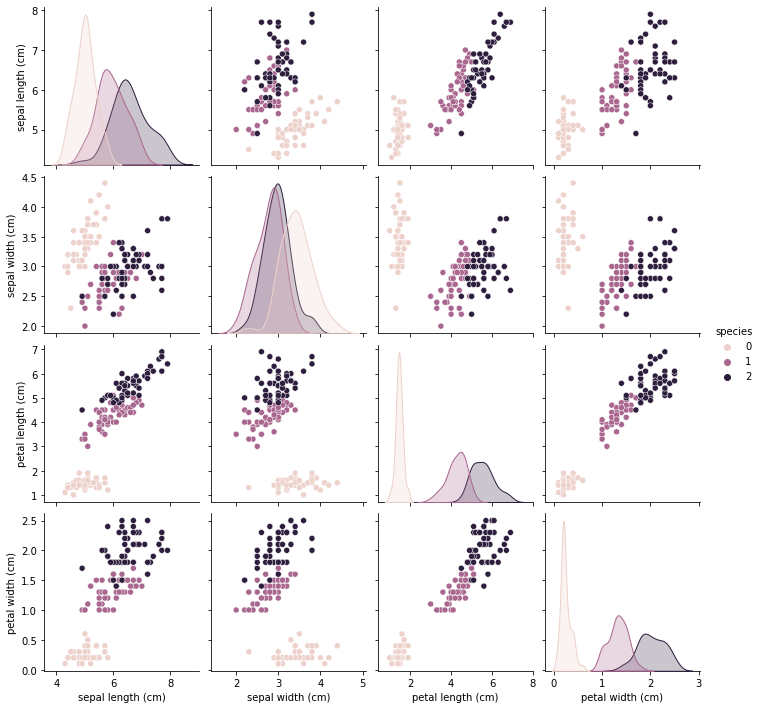

In [52]:
sns.pairplot(iris, hue = 'species')

In [ ]:
X

In [ ]:
y

### 3.2 문제와 답 7:3 비율로 나누기

In [53]:
y['species'] # 시리즈 형태

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [54]:
y_en = pd.get_dummies(y['species'])

In [55]:
y_en

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y_en,
                                                   test_size = 0.3,
                                                   random_state = 60)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

### 3.3 신경망 설계

In [ ]:
model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)
model.add(Dense(16, input_dim =4 , activation="relu")) # 은닉층1
model.add(Dense(32, input_dim =4 , activation="relu"))# 은닉층2
model.add(Dense(3, activation="softmax")) # 출력층

model.summary()

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

### 3.4 학습

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

### 3.5 평가

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.predict(X_test)

### 4 BMI로 비만 예측 (다중 분류)

### 1. 문제와 답 나누기

In [60]:
bmi_data = pd.read_csv('data/bmi.csv')

In [61]:
bmi_data

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin
...,...,...,...
19995,157,67,fat
19996,138,40,normal
19997,163,62,normal
19998,169,68,normal


In [63]:
# X = wine.iloc[:, :11] 
# y = wine.iloc[:,11]
y = bmi_data.iloc[:, -1]
del bmi_data['label']
X = bmi_data

X.shape, y_en.shape


((20000, 2), (20000, 3))

In [71]:
X

,height,weight
0,140,45
1,145,72
2,150,61
3,137,56
4,192,48
...,...,...
19995,157,67
19996,138,40
19997,163,62
19998,169,68


In [74]:
y

0        normal
1           fat
2           fat
3           fat
4          thin
          ...  
19995       fat
19996    normal
19997    normal
19998    normal
19999      thin
Name: label, Length: 20000, dtype: object

### 2. 문제와 답 7:3 비율로 나누기

In [ ]:
y_en = pd.get_dummies(y)  #원핫 인코딩, y 컬럼을 3개(normal, fat, thin)로 인코딩

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_en,
                                                   test_size = 0.3,
                                                   random_state = 60)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 2), (6000, 2), (14000, 3), (6000, 3))

### 3. 신경망 설계

In [65]:
model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)
model.add(Dense(16, input_dim =2 , activation="relu")) # 은닉층1
model.add(Dense(32,activation="relu"))# 은닉층2
model.add(Dense(3, activation="softmax")) # 출력층

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

### 4. 학습

In [70]:
model.fit(X_train, y_train, epochs=50, batch_size=10)

Train on 14000 samples
Epoch 1/50
14000/14000 [==============================] - 2s 127us/sample - loss: 0.1509 - accuracy: 0.9576
Epoch 2/50
14000/14000 [==============================] - 2s 119us/sample - loss: 0.1399 - accuracy: 0.9604
Epoch 3/50
14000/14000 [==============================] - 2s 117us/sample - loss: 0.1310 - accuracy: 0.9578
Epoch 4/50
14000/14000 [==============================] - 2s 118us/sample - loss: 0.1191 - accuracy: 0.9601
Epoch 5/50
14000/14000 [==============================] - 2s 119us/sample - loss: 0.1101 - accuracy: 0.9644
Epoch 6/50
14000/14000 [==============================] - 2s 118us/sample - loss: 0.1028 - accuracy: 0.9672
Epoch 7/50
14000/14000 [==============================] - 2s 117us/sample - loss: 0.0996 - accuracy: 0.9644
Epoch 8/50
14000/14000 [==============================] - 2s 118us/sample - loss: 0.0913 - accuracy: 0.9704
Epoch 9/50
14000/14000 [==============================] - 2s 117us/sample - loss: 0.0908 - accuracy: 0.9689
Epoch

### 5. 평가

In [72]:
model.evaluate(X_test, y_test)

6000/6000 [==============================] - 0s 46us/sample - loss: 0.0383 - accuracy: 0.9867


[0.03829915299018224, 0.9866667]

In [73]:
model.predict(X_test)

array([[9.9999869e-01, 1.3499265e-06, 6.1989750e-25],
       [3.6474265e-11, 9.9952149e-01, 4.7852501e-04],
       [1.0000000e+00, 1.2016639e-17, 0.0000000e+00],
       ...,
       [1.6300409e-12, 9.9726677e-01, 2.7332755e-03],
       [4.1377158e-03, 9.9586225e-01, 7.0087292e-09],
       [0.0000000e+00, 7.2201483e-22, 1.0000000e+00]], dtype=float32)

In [75]:
model.predict([[166,50]])

array([[9.12655641e-20, 1.04971044e-01, 8.95028949e-01]], dtype=float32)

### 보스턴 집각 예측(회귀)

In [6]:
from tensorflow.keras.datasets import boston_housing

## 시드 값 설정

In [7]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

### 1. 문제와 답 나누기

In [8]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [10]:
print(X_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [ ]:
# 컴파일 loss = 'mean_squared_error'

### 2. 신경망 설계

In [11]:
model = Sequential() # 신경망 생성 ( 한층 한층 쌓는 기능)
model.add(Dense(30, input_dim =13 , activation="relu")) # 은닉층1
# model.add(Dense(1, activation="sigmoid")) # 출력층
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['accuracy'])

### 3. 학습

In [13]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

Train on 404 samples
Epoch 1/200
404/404 [==============================] - 1s 3ms/sample - loss: 1777.7407 - accuracy: 0.0000e+00
Epoch 2/200
404/404 [==============================] - 0s 186us/sample - loss: 165.6672 - accuracy: 0.0000e+00
Epoch 3/200
404/404 [==============================] - 0s 152us/sample - loss: 122.4341 - accuracy: 0.0000e+00
Epoch 4/200
404/404 [==============================] - 0s 196us/sample - loss: 103.2501 - accuracy: 0.0000e+00
Epoch 5/200
404/404 [==============================] - 0s 150us/sample - loss: 87.1933 - accuracy: 0.0000e+00
Epoch 6/200
404/404 [==============================] - 0s 145us/sample - loss: 78.0767 - accuracy: 0.0000e+00
Epoch 7/200
404/404 [==============================] - 0s 141us/sample - loss: 71.6162 - accuracy: 0.0000e+00
Epoch 8/200
404/404 [==============================] - 0s 147us/sample - loss: 63.9329 - accuracy: 0.0000e+00
Epoch 9/200
404/404 [==============================] - 0s 157us/sample - loss: 59.1988 - accurac

404/404 [==============================] - 0s 143us/sample - loss: 28.6802 - accuracy: 0.0000e+00
Epoch 75/200
404/404 [==============================] - 0s 140us/sample - loss: 32.8208 - accuracy: 0.0000e+00
Epoch 76/200
404/404 [==============================] - 0s 142us/sample - loss: 30.7537 - accuracy: 0.0000e+00
Epoch 77/200
404/404 [==============================] - 0s 155us/sample - loss: 33.6917 - accuracy: 0.0000e+00
Epoch 78/200
404/404 [==============================] - 0s 147us/sample - loss: 28.7948 - accuracy: 0.0000e+00
Epoch 79/200
404/404 [==============================] - 0s 143us/sample - loss: 29.3954 - accuracy: 0.0000e+00
Epoch 80/200
404/404 [==============================] - 0s 145us/sample - loss: 30.9198 - accuracy: 0.0000e+00
Epoch 81/200
404/404 [==============================] - 0s 147us/sample - loss: 28.8485 - accuracy: 0.0000e+00
Epoch 82/200
404/404 [==============================] - 0s 145us/sample - loss: 31.9783 - accuracy: 0.0000e+00
Epoch 83/200
4

404/404 [==============================] - 0s 193us/sample - loss: 25.4910 - accuracy: 0.0000e+00
Epoch 148/200
404/404 [==============================] - 0s 169us/sample - loss: 25.2527 - accuracy: 0.0000e+00
Epoch 149/200
404/404 [==============================] - 0s 140us/sample - loss: 25.3734 - accuracy: 0.0000e+00
Epoch 150/200
404/404 [==============================] - 0s 145us/sample - loss: 24.6837 - accuracy: 0.0000e+00
Epoch 151/200
404/404 [==============================] - 0s 157us/sample - loss: 24.1356 - accuracy: 0.0000e+00
Epoch 152/200
404/404 [==============================] - 0s 145us/sample - loss: 25.5946 - accuracy: 0.0000e+00
Epoch 153/200
404/404 [==============================] - 0s 143us/sample - loss: 25.2018 - accuracy: 0.0000e+00
Epoch 154/200
404/404 [==============================] - 0s 140us/sample - loss: 26.3057 - accuracy: 0.0000e+00
Epoch 155/200
404/404 [==============================] - 0s 140us/sample - loss: 26.4185 - accuracy: 0.0000e+00
Epoch 

### 4. 평가

In [14]:
# Y_prediction = model.predict(X_test).flatten()
# for i in range(10):
#     label = y_test[i]
#     prediction = Y_prediction[i]
#     print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))
    

y_pre = model.predict(X_test)
for i in range(10):
    print("실제가격 : {}, 예상가격 : {}".format(y_test[i], y_pre[i][0]))
    

실제가격 : 7.2, 예상가격 : 11.41717529296875
실제가격 : 18.8, 예상가격 : 19.411243438720703
실제가격 : 19.0, 예상가격 : 22.948143005371094
실제가격 : 27.0, 예상가격 : 31.608844757080078
실제가격 : 22.2, 예상가격 : 24.585020065307617
실제가격 : 24.5, 예상가격 : 22.281383514404297
실제가격 : 31.2, 예상가격 : 30.722591400146484
실제가격 : 22.9, 예상가격 : 22.587810516357422
실제가격 : 20.5, 예상가격 : 17.587779998779297
실제가격 : 23.2, 예상가격 : 21.534706115722656


In [15]:
price_diff = []

for i in range(len(y_test)):
    price_diff.append(np.abs(y_test[i]-y_pre[i][0]))
    
np.average(price_diff)

3.5305979298610315

In [17]:
test_mse_score = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 633us/sample - loss: 24.1167 - accuracy: 0.0000e+00


In [18]:
test_mse_score

[24.116746865066826, 0.0]

In [92]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 706us/sample - loss: 37.6296 - accuracy: 0.0000e+00


[37.629565818637026, 0.0]